In [1]:
import numpy as np
import scipy.special

import matplotlib.pyplot as plt

In [25]:
class FunctionCounting(object):   

    """Plot the number of homogeneously linearly separable dichotomies of N points 
    in general position in Euclidean d-space for d = 25 as a function of N. 
    Put N on the horizontal axis, and let N range from 1 to 100. 
    Normalise the vertical axis by the total number of dichotomies 2^N. 
    Hint: take care with how Cover defines the binomial coefficient

    Calculate the number of homogeneously linearly separable dichotomies 
    for given number of points N in Euclidean d-space following the equation (5) in 
    Geometrical and Statistical Properties of Systems of Linear Inequalities 
    with Applications in Pattern Recognition, IEEE Trans. 
    Electron. Comput., T. Cover, 1965.

    Since the calculated ones are very off, 
    a method with the default bionomial coefficients is also included.
    """

    def __init__(self, N_start, N_end, d):
        """Get the Ns and ks"""
        self.N_start = N_start
        self.N_end = N_end
        self.N_range = range(self.N_start, self.N_end+1)
        self.Ns = np.arange(self.N_start, self.N_end+1)
        self.d = d
        self.ks = np.arange(d)

    def get_coeff(self, s, k):
        """Get the binomial coefficients comprising (N, d) defined for
        all real s and integer k in equation 6"""
        # print("k = {0}".format(k))
        if k > 0:
            num = np.prod(s - np.arange(k))
            # print(s - np.arange(k), num, num/np.math.factorial(k))
            return num/np.math.factorial(k)
        elif k == 0:
            # print(s*(s+1), s*(s+1)/np.math.factorial(k))
            return s*(s+1)/np.math.factorial(k)
        else:
            print("The current version is not considering k < 0")

    def get_C(self, N):
        """Calculate the homogeneously linearly separable dichotomies 
        of N points in general position in Euclidean d-space
        in equation 5 with 2^N normalization"""
        return 2*np.sum(np.array([self.get_coeff(N-1, k) for k in self.ks]))/(2**N)

    def get_Cs(self):
        """Get the array of the homogeneously linearly separable dichotomies 
        of N points in general position in Euclidean d-space
        in equation 5"""
        return np.array([self.get_C(N) for N in self.Ns])

    def default_Cs(self):
        """Calculate the binomial coeffs with scipy bino"""
        return np.array([2*np.sum(np.array([scipy.special.binom(N-1, k) for k in np.arange(self.d)]))/2**N for N in self.N_range])
    
    def plot(self, ifdefault=True):
        """Plot the number of homogeneously linearly separable dichotomies of N points
        in general position in Euclidean d-space for as a function of N"""
        if ifdefault:
            Cs = self.default_Cs()
            added = ""
        else:
            Cs = self.get_Cs()
            added = "_manual"

        plt.plot(self.Ns, Cs)
        plt.title("Homogeneously linearly separable dichotomies of N points, d = {0}{1}".format(self.d, added))
        plt.xlabel("N")
        plt.ylabel("$2^N$ normalized dichotomy number")
        plt.savefig("hw4_pb2{0}.png".format(added))



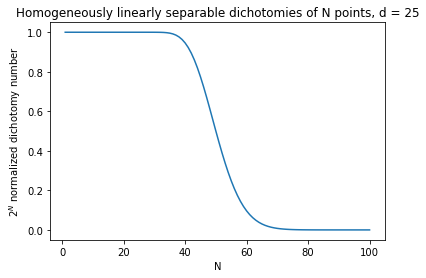

In [26]:
FunctionCounting(1, 100, 25).plot()

<ipython-input-25-60002dc55075>:46: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*np.sum(np.array([self.get_coeff(N-1, k) for k in self.ks]))/(2**N)


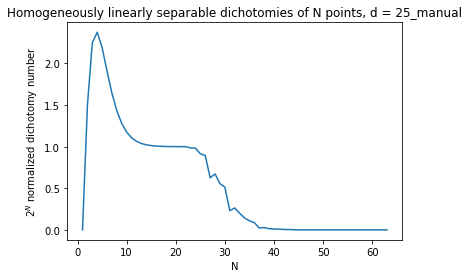

In [27]:
# FunctionCounting(1, 100, 25).plot(ifdefault=False)

In [28]:
!jupyter nbconvert --to script hw4_pb2.ipynb

[NbConvertApp] Converting notebook hw4_pb2.ipynb to script
[NbConvertApp] Writing 4063 bytes to hw4_pb2.py
